<a href="https://colab.research.google.com/github/JerryChenz/Trading_Proc_v1/blob/working_version/trading_activity_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Environment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_file = 'https://github.com/JerryChenz/Trading_Proc_v1/blob/working_version/data/9913.HK_20250424.csv?raw=true'

# Load CSV data
df = pd.read_csv(data_file, parse_dates=['atDate'], dayfirst=True)

# Set date as index for time-based operations
df.set_index('atDate', inplace=True)

print(df.head())

            settleDate  susp  closing   bid   ask   low  high      vol  \
atDate                                                                   
2025-04-24  2025-04-28     0     2.51  2.51  2.56  2.51  2.59   332000   
2025-04-23  2025-04-25     0     2.55  2.56  2.60  2.52  2.67  1412000   
2025-04-22  2025-04-24     0     2.53  2.50  2.55  2.50  2.57   548000   
2025-04-17  2025-04-23     0     2.53  2.52  2.53  2.52  2.55   204000   
2025-04-16  2025-04-22     0     2.54  2.50  2.55  2.49  2.67   624000   

               turn      VWAP  adjClose  adjBid  adjAsk  adjLow  adjHigh  \
atDate                                                                     
2025-04-24   858960  2.587229      2.51    2.51    2.56    2.51     2.59   
2025-04-23  3633000  2.572946      2.55    2.56    2.60    2.52     2.67   
2025-04-22  1393840  2.543504      2.53    2.50    2.55    2.50     2.57   
2025-04-17   514600  2.522549      2.53    2.52    2.53    2.52     2.55   
2025-04-16  1585560  2.54

<ipython-input-10-f7deeca8d826>:7: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(data_file, parse_dates=['atDate'], dayfirst=True)


# Monthly View

In [ ]:
# Group by month
grouped = df.groupby(pd.Grouper(freq='M'))

# Calculate monthly volume sum
monthly_vol = grouped['vol'].sum().to_frame(name='Monthly Volume')

# Calculate correct monthly VWAP: sum(VWAP * volume) / sum(volume)
monthly_vwap = grouped.apply(
    lambda x: (x['VWAP'] * x['vol']).sum() / x['vol'].sum()
).to_frame(name='Monthly VWAP')

# Combine results
monthly_stats = pd.concat([monthly_vol, monthly_vwap], axis=1)

# Add date ranges
monthly_stats['Start_Date'] = grouped.apply(lambda x: x.index.min())
monthly_stats['End_Date'] = grouped.apply(lambda x: x.index.max())

# Format dates
monthly_stats['Start_Date'] = monthly_stats['Start_Date'].dt.strftime('%Y-%m-%d')
monthly_stats['End_Date'] = monthly_stats['End_Date'].dt.strftime('%Y-%m-%d')

# Sort descending and clean up
monthly_stats_sorted = monthly_stats.sort_index(ascending=False)

print("\nMonthly Volumes and VWAP:")
print(monthly_stats_sorted[['Monthly Volume', 'Monthly VWAP', 'Start_Date', 'End_Date']])

# Save to CSV
monthly_stats_sorted.to_csv('monthly_stats.csv')


Monthly Volumes and VWAP:
            Monthly Volume  Monthly VWAP  Start_Date    End_Date
atDate                                                          
2025-04-30         9884000      2.539417  2025-04-01  2025-04-24
2025-03-31         8504000      2.504464  2025-03-03  2025-03-31
2025-02-28         3244000      2.484809  2025-02-03  2025-02-28
2025-01-31         3192000      2.414148  2025-01-02  2025-01-28
2024-12-31         1581720      2.632822  2024-12-02  2024-12-31
2024-11-30         2036000      2.692515  2024-11-01  2024-11-29
2024-10-31         1758160      2.774373  2024-10-02  2024-10-31
2024-09-30         3024840      2.363999  2024-09-02  2024-09-30
2024-08-31         4106514      2.435156  2024-08-01  2024-08-30
2024-07-31         4762000      2.453967  2024-07-02  2024-07-31
2024-06-30         1812440      2.688566  2024-06-03  2024-06-28
2024-05-31         2938300      2.808254  2024-05-02  2024-05-31
2024-04-30         4701400      2.962985  2024-04-02  2024-04-3

<ipython-input-26-6cd6fd733cac>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  grouped = df.groupby(pd.Grouper(freq='M'))


# Visualize Results

<Figure size 1200x600 with 0 Axes>

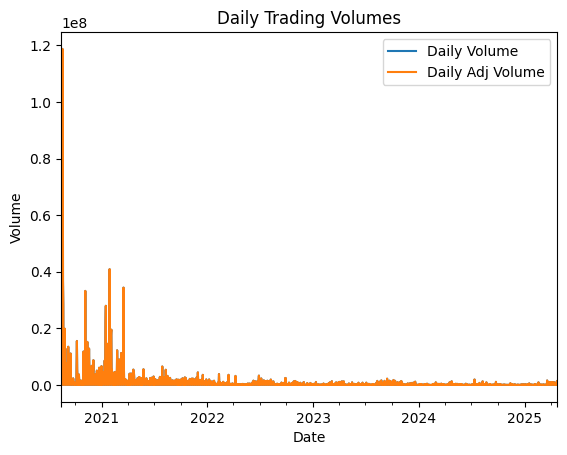

<Figure size 1200x600 with 0 Axes>

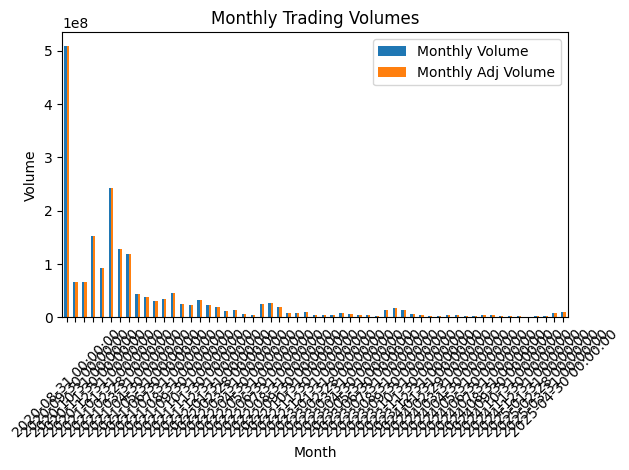

In [ ]:
# Plot monthly volumes
plt.figure(figsize=(12, 6))
monthly_volumes.plot(kind='bar')
plt.title('Monthly Trading Volumes')
plt.ylabel('Volume')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()